# Digit recognition Notebook
This notebook should outline how the digit recognition script included in this project should work. It should outline how a Convolutional Neural Network works. It should also cover how to run the script and the different functions that it performs.

The script was trained using the MNIST dataset that was covered in a previous notebook. MNIST is a dataset that consists of 60,000 training images and labels with hand written digits in the range of 0-9 that was taken from the NIST dataset. 

## Running the script
To run the script you will need to clone the git repository from [here](https://github.com/lanodburke/Emerging-Technologies-Project.git).

This script takes in command line arguments which are outlined below: 
- -h (help): will print some instructions describing the different parameters
- -b (build): this will build the keras model that will be used to run the digit recognition
- -t (test): this will take in an input file as an argument such as a PNG, JPG or any other image format

### Build the model 
Builds the model and saves it with the .h5 file format
```
python digitrec.py -b
```

### Test the model
Run the saved model and make a prediction on the image passed in as an argument
```
python digitrec.py -t image.png
```

## Convolutional Neural Network
> Convolutional Neural Networks have a different architecture than regular Neural Networks. Regular Neural Networks transform an input by putting it through a series of hidden layers. Every layer is made up of a set of neurons, where each layer is fully connected to all neurons in the layer before. Finally, there is a last fully-connected layer — the output layer — that represent the predictions.

> Convolutional Neural Networks are a bit different. First of all, the layers are organised in 3 dimensions: width, height and depth. Further, the neurons in one layer do not connect to all the neurons in the next layer but only to a small region of it. Lastly, the final output will be reduced to a single vector of probability scores, organized along the depth dimension.

### Neural Network Architecture 
![alt text](http://cs231n.github.io/assets/nn1/neural_net2.jpeg "Neural Network")

### Convolutional Neural Network Architecture
![alt text](http://cs231n.github.io/assets/cnn/cnn.jpeg "Convolutional Neural Network")


Convolutional Nerual networks have two parts: 
- Hidden layers/Feature extraction
- Classification

### Feature Extraction
To understand feature extraction we first have to look at what is an image feature. 

An image feature can be described as a section of an image that is consistent with images of the same object. For example take an image of a cat, the cats eye can be seen as a visual feature of a cat. This feature is generally consistitent with most cats. 

Feature extraction extracts features in an image and finds a pattern between them and if these features are consistent between all images of an object it will learn that these features can be used to identify the object.

The main feature of feature extraction in image classification is to transform the visual feature to a mathematical vector for computational use.

We do this so computers will be able to compare the similarity of features easily.

### Convolution
> Convolution is the first layer to extract features from an input image. Convolution preserves the relationship between pixels by learning image features using small squares of input data. It is a mathematical operation that takes two inputs such as image matrix and a filter or kernal

#### Example
Consider a 5 x 5 whose image pixel values are 0, 1 and filter matrix 3 x 3 as shown in below

![example](https://cdn-images-1.medium.com/max/1600/1*4yv0yIH0nVhSOv3AkLUIiw.png)

Then the convolution of 5 x 5 image matrix multiplies with 3 x 3 filter matrix which is called “Feature Map” as output shown in below

![example](https://cdn-images-1.medium.com/max/1600/1*MrGSULUtkXc0Ou07QouV8A.gif)

Convolution of an image with different filters can perform operations such as edge detection, blur and sharpen by applying filters. The below example shows various convolution image after applying different types of filters (Kernels).

![example](https://cdn-images-1.medium.com/max/1600/1*uJpkfkm2Lr72mJtRaqoKZg.png)

The examples above were describing a convultion in 2D, but in reality these convolutions are performed in 3d as each image is represented by height, width and depth. The height and the width describe the position of the pixels in the image and the depth the describes the color channels i.e the RGB values. An example of a convultional operation can be seen below

![example](https://cdn-images-1.medium.com/max/1600/1*EuSjHyyDRPAQUdKCKLTgIQ.png)

### Classification 
>After the convolution layer, our classification part consists of a few fully connected layers. However, these fully connected layers can only accept 1 Dimensional data. To convert our 3D data to 1D, we use the function flatten in Python. This essentially arranges our 3D volume into a 1D vector.

>The last layers of a Convolutional NN are fully connected layers. Neurons in a fully connected layer have full connections to all the activations in the previous layer. This part is in principle the same as a regular Neural Network.


## Script overview
This section of the notebook should cover how I implemented a convolutional neural network and the steps involved in doing so. It should also outline the different code snippets in the script explaining what each section does.

### Required Imports
Import the following packages that are required to run the script, you can install these libraries using the python package mangager tool pip.

#### Example usage
```
pip install numpy
```

In [4]:
import numpy
import os.path
import sys, getopt
import cv2
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
from keras.models import load_model
from keras.preprocessing import image
K.set_image_dim_ordering('th')

### Loading the MNIST dataset 
For this script I decided to use the keras implementation of the MNIST dataset, to load the dataset you just need to call the function outlined below.

In [3]:
# Load MNIST dataset from keras
(X_train, y_train), (X_test, y_test) = mnist.load_data()

### Reshaping the dataset
To use the MNIST dataset as a training set we need to run a few operations to prepare it as inputs for our model, this can be seen in the ```pre_process()``` function in the script.

In [5]:
def pre_process():
    (X_train, y_train), (X_test, y_test) = mnist.load_data()

    # reshape to be samples, pixels, width, height
    X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
    X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')

    # normalize inputs from 0-255 to 0-1
    X_train = X_train / 255
    X_test = X_test / 255
    # one hot encode outputs
    y_train = np_utils.to_categorical(y_train)
    y_test = np_utils.to_categorical(y_test)

    return (X_train, y_train), (X_test, y_test)

### Building the model
To build the model we will be using keras and tensorflow. Keras is an open source python library that provides a set of tools to allow developers to design neural networks with relative ease. 

In [6]:
def build_model(X_train, y_train, X_test, y_test, num_classes):
    model = Sequential()
    model.add(Conv2D(32, (5, 5), input_shape=(1, 28, 28), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    # Fit the model
    model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)
    return model

### Code Summary
Lets go over the function above in detail so we can try and understand exactly whats going on.
- First layer in the model is a Convolutional layer with 32 filters/outputs, with the size of 5 * 5 and the relu (Rectified Linear Unit) activation function. This is the input layer which expects images with the following format; (height, width, channels). Channels in this case are set to 0-1 as images are grayscale and not in the full RGB range.
- The second layer in the model is a Max Pooling layer. Max pooling is done by applying a max filter to (usually) non-overlapping subregions of the initial representation. The objective is to down-sample an input representation, reducing its dimensionality and allowing for assumptions to be made about features contained in the sub-regions. This is done to in part to help over-fitting by providing an abstracted form of the representation.
- Third layer is a Dropout layer to exclude a certain number of neurons during training in this instance it will exclude 20%. This is used as to not over fit the model.
- Fourth layer in the model is a flatten layer. This will flatten the output from the Convultional layer to a vector that can be used by the classification step in the model.
- Fifth layer is a fully connected layer with 128 neurons.
- The last layer is a Dense layer with the number of classes in the dataset with the softmax activation function.

### Evaluating training
Display training evaluation graphs with function that I found from [here](https://www.kaggle.com/danbrice/keras-plot-history-full-report-and-grid-search).

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 77s 1ms/step - loss: 0.0135 - acc: 0.9956 - val_loss: 0.0358 - val_acc: 0.9890
Epoch 2/10
60000/60000 [==============================] - 78s 1ms/step - loss: 0.0102 - acc: 0.9967 - val_loss: 0.0342 - val_acc: 0.9887
Epoch 3/10
60000/60000 [==============================] - 75s 1ms/step - loss: 0.0093 - acc: 0.9970 - val_loss: 0.0384 - val_acc: 0.9884
Epoch 4/10
60000/60000 [==============================] - 75s 1ms/step - loss: 0.0070 - acc: 0.9978 - val_loss: 0.0340 - val_acc: 0.9896
Epoch 5/10
60000/60000 [==============================] - 74s 1ms/step - loss: 0.0069 - acc: 0.9979 - val_loss: 0.0360 - val_acc: 0.9890
Epoch 6/10
60000/60000 [==============================] - 75s 1ms/step - loss: 0.0064 - acc: 0.9982 - val_loss: 0.0348 - val_acc: 0.9906
Epoch 7/10
60000/60000 [==============================] - 76s 1ms/step - loss: 0.0065 - acc: 0.9977 - val_loss: 0.0389 - val_acc

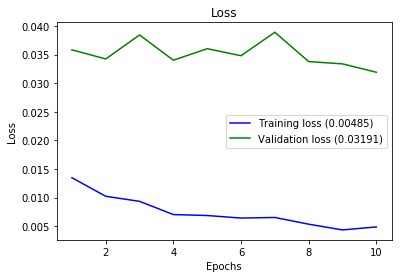

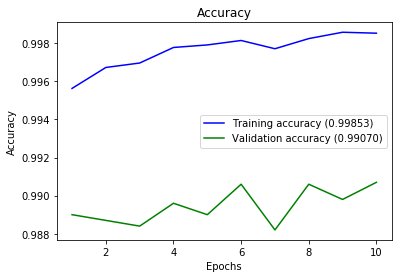

In [13]:
(X_train, y_train), (X_test, y_test) = pre_process()

# Load the model from file
model = load_model("digitrec_model.h5")
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the data
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=300)

def plot_history(history):
    loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' not in s]
    val_loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' in s]
    acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' not in s]
    val_acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' in s]
    
    if len(loss_list) == 0:
        print('Loss is missing in history')
        return 
    
    ## As loss always exists
    epochs = range(1,len(history.history[loss_list[0]]) + 1)
    
    ## Loss
    plt.figure(1)
    for l in loss_list:
        plt.plot(epochs, history.history[l], 'b', label='Training loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    for l in val_loss_list:
        plt.plot(epochs, history.history[l], 'g', label='Validation loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    ## Accuracy
    plt.figure(2)
    for l in acc_list:
        plt.plot(epochs, history.history[l], 'b', label='Training accuracy (' + str(format(history.history[l][-1],'.5f'))+')')
    for l in val_acc_list:    
        plt.plot(epochs, history.history[l], 'g', label='Validation accuracy (' + str(format(history.history[l][-1],'.5f'))+')')

    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()
    
plot_history(history)

## Model evaluation
Now lets test out the model that we created, first we will load the saved model by calling the ```load_model()``` function from keras. We will also use the ```load_image()``` function from the script to convert the image into input that can be read by our model. We will also display the image and the prediction with the ```display_image()``` function in the script.

#### Preparing an input image
For this script I had to convert the image input by the user into input that can be read by our model. The function is outlined below.

In [17]:
# Load image function takes one parameter, the image path and coverts the image to input that can be read by our model
def load_image(img_path):
    # load_img function from keras
    img = image.load_img(img_path, color_mode="grayscale", target_size=(28, 28))
    img_tensor = image.img_to_array(img)
    img_tensor = img_tensor.reshape(img_tensor.shape[0], 1, 28, 28).astype('float32')
    # img_tensor = numpy.expand_dims(img_tensor, axis=0)
    img_tensor = img_tensor / 255
    return img_tensor

#### Display output
The below function will display an image with the prediction output by our model. The code snippet for the function can be seen below.

In [15]:
# Display image function takes in two parameters the predicted value from our model and the image path.
# This function will display the image with the imshow() function from matplotlib 
def display_image(pred, img_path):
    # Adding a title to the Plot 
    plt.title("Prediction: " + str(pred))
    # Using the plt.imshow() to add the image plot to 
    # the matplotlib figure 
    img = image.load_img(img_path, target_size=(28, 28))
    plt.imshow(img, cmap='gray')
    # This just hides x and y tick values by passing in 
    # empty lists to make the output a little cleaner 
    plt.xticks([]), plt.yticks([]) 
    plt.show()

### Making a prediction
The code snippet below will load the model that we build with the script and will take an input image as an argument and make a prediction on the image and display the output with the image and the given prediction.

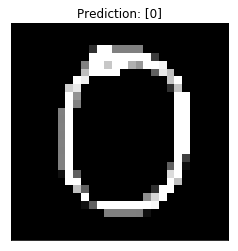

In [23]:
# Load model
model = load_model("digitrec_model.h5")
# Load image from file
new_image = load_image("images/0.png")
# Make prediction
pred = model.predict_classes(new_image)
# Display image with prediction
display_image(pred, "images/0.png")

## Conlusion
In conclusion the overall accuarcy achieved was 99% as seen in the graph above. The overall training took about 10-15 minutes. While writing this notebook and coding up the digitrec.py script I learn alot about Convolutional Nerual Networks and how they are applied to image classification. This overall project was a great learning experience and gave me a real insight into the basics of machine learning and data science.

## Refrences
- [High level outline of CNNs](https://medium.freecodecamp.org/an-intuitive-guide-to-convolutional-neural-networks-260c2de0a050)
- [Section on Convultion in Nerual Networks](https://medium.com/@RaghavPrabhu/understanding-of-convolutional-neural-network-cnn-deep-learning-99760835f148)